In [15]:
!pip install easytorch

In [10]:
from easytorch import EasyTorch, ETTrainer, ConfusionMatrix
from torchvision import datasets, transforms
from torch import nn
import torch.nn.functional as F
import torch
from IPython.display import Image
import json

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

**Define neural network. I just burrowed from here: https://github.com/pytorch/examples/blob/master/mnist/main.py**

In [3]:
class MNISTNet(nn.Module):
    def __init__(self):
        super(MNISTNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

In [4]:
class MNISTExperiment(EasyTorch):
    def _load_dataset(self, split_key, dataspec: dict, **kw):
        if split_key == 'train':
            return datasets.MNIST('../data', train=True, download=True,
                                  transform=transform)
        elif split_key == 'validation':
            return datasets.MNIST('../data', train=False,
                                  transform=transform)

In [5]:

class MNISTTrainer(ETTrainer):
    def _init_nn_model(self):
        self.nn['model'] = MNISTNet()

    def iteration(self, batch):
        inputs = batch[0].to(self.device['gpu']).float()
        labels = batch[1].to(self.device['gpu']).long()

        out = self.nn['model'](inputs)
        loss = F.nll_loss(out, labels)

        _, pred = torch.max(out, 1)
        sc = self.new_metrics()
        sc.add(pred, labels)

        avg = self.new_averages()
        avg.add(loss.item(), len(inputs))

        return {'loss': loss, 'averages': avg, 'metrics': sc, 'predictions': pred}

    def init_experiment_cache(self):
        self.cache['log_header'] = 'Loss|Accuracy,F1,Precision,Recall'
        self.cache.update(monitor_metric='f1', metric_direction='maximize')

    def new_metrics(self):
        return ConfusionMatrix(num_classes=10)

In [6]:
runner = MNISTExperiment(phase='train', batch_size=128, epochs=3, gpus=[0])
runner.run(MNISTTrainer)


[WARNING]! 1 GPU(s) requested but GPU(s) not detected. Using CPU(Much slower).
[SUCCESS]! Starting with the following parameters:
{'batch_size': 128,
 'dataset_dir': '',
 'epochs': 3,
 'force': False,
 'gpus': [],
 'grad_accum_iters': 1,
 'learning_rate': 0.001,
 'load_limit': 9223372036854775807,
 'load_sparse': False,
 'log_dir': 'net_logs',
 'num_folds': None,
 'num_workers': 4,
 'patience': 11,
 'phase': 'train',
 'pin_memory': False,
 'pretrained_path': None,
 'seed': 15826957,
 'seed_all': False,
 'split_ratio': None,
 'verbose': True}
[SUCCESS]! 1 split(s) loaded from 'net_logs/experiment/splits' directory.

### Previous training log 'net_logs/experiment/experiment_log.json' exists. ### Override [y/n]:
[SUCCESS]! Total params in model: 1199882
Training ...
Ep:1/3,Itr:1/469,[5.5069],[0.16406, 0.12244, 0.12663, 0.11851]
Ep:1/3,Itr:2/469,[6.72123],[0.11719, 0.11294, 0.12643, 0.10204]
Ep:1/3,Itr:3/469,[3.79215],[0.19531, 0.20856, 0.1945, 0.22481]
Ep:1/3,Itr:4/469,[2.5503],[0.26562,

Ep:1/3,Itr:117/469,[0.46355],[0.8125, 0.82526, 0.81758, 0.83309]
Ep:1/3,Itr:118/469,[0.29109],[0.89844, 0.90818, 0.9101, 0.90625]
Ep:1/3,Itr:119/469,[0.50784],[0.88281, 0.88479, 0.88882, 0.8808]
Ep:1/3,Itr:120/469,[0.30233],[0.94531, 0.94552, 0.94552, 0.94552]
Ep:1/3,Itr:121/469,[0.37603],[0.89062, 0.88994, 0.88883, 0.89105]
Ep:1/3,Itr:122/469,[0.39565],[0.88281, 0.88171, 0.88051, 0.88292]
Ep:1/3,Itr:123/469,[0.38712],[0.875, 0.87394, 0.87635, 0.87155]
Ep:1/3,Itr:124/469,[0.43617],[0.85938, 0.86381, 0.86748, 0.86017]
Ep:1/3,Itr:125/469,[0.4285],[0.83594, 0.84445, 0.84008, 0.84887]
Ep:1/3,Itr:126/469,[0.47232],[0.85938, 0.8633, 0.86027, 0.86635]
Ep:1/3,Itr:127/469,[0.37592],[0.875, 0.88306, 0.88384, 0.88229]
Ep:1/3,Itr:128/469,[0.50998],[0.83594, 0.83463, 0.82964, 0.83969]
Ep:1/3,Itr:129/469,[0.35107],[0.89844, 0.89258, 0.8966, 0.88859]
Ep:1/3,Itr:130/469,[0.56458],[0.83594, 0.8449, 0.8546, 0.83542]
Ep:1/3,Itr:131/469,[0.38098],[0.89844, 0.90432, 0.90895, 0.89973]
Ep:1/3,Itr:132/469,[0.

Ep:1/3,Itr:243/469,[0.1718],[0.92969, 0.9349, 0.9324, 0.93742]
Ep:1/3,Itr:244/469,[0.14686],[0.92188, 0.91812, 0.91262, 0.92369]
Ep:1/3,Itr:245/469,[0.27561],[0.90625, 0.90682, 0.90716, 0.90648]
Ep:1/3,Itr:246/469,[0.1475],[0.95312, 0.95398, 0.95108, 0.9569]
Ep:1/3,Itr:247/469,[0.28123],[0.92188, 0.92672, 0.92465, 0.92881]
Ep:1/3,Itr:248/469,[0.30683],[0.90625, 0.91044, 0.91931, 0.90175]
Ep:1/3,Itr:249/469,[0.2316],[0.92188, 0.91603, 0.91481, 0.91726]
Ep:1/3,Itr:250/469,[0.28207],[0.92969, 0.92872, 0.92521, 0.93225]
Ep:1/3,Itr:251/469,[0.19261],[0.92969, 0.92487, 0.92887, 0.9209]
Ep:1/3,Itr:252/469,[0.16387],[0.9375, 0.93736, 0.94101, 0.93373]
Ep:1/3,Itr:253/469,[0.20414],[0.92188, 0.91076, 0.91636, 0.90522]
Ep:1/3,Itr:254/469,[0.21885],[0.94531, 0.94354, 0.95031, 0.93687]
Ep:1/3,Itr:255/469,[0.25777],[0.89844, 0.90602, 0.90579, 0.90626]
Ep:1/3,Itr:256/469,[0.15973],[0.94531, 0.95097, 0.95482, 0.94716]
Ep:1/3,Itr:257/469,[0.19332],[0.9375, 0.93665, 0.94492, 0.92853]
Ep:1/3,Itr:258/469,

Ep:1/3,Itr:370/469,[0.14368],[0.94531, 0.94033, 0.94051, 0.94015]
Ep:1/3,Itr:371/469,[0.17991],[0.95312, 0.95328, 0.94893, 0.95768]
Ep:1/3,Itr:372/469,[0.27282],[0.9375, 0.93354, 0.93604, 0.93104]
Ep:1/3,Itr:373/469,[0.16887],[0.96094, 0.96287, 0.96495, 0.96079]
Ep:1/3,Itr:374/469,[0.24415],[0.9375, 0.93705, 0.93546, 0.93864]
Ep:1/3,Itr:375/469,[0.22848],[0.9375, 0.9416, 0.94682, 0.93645]
Ep:1/3,Itr:376/469,[0.11716],[0.96094, 0.95596, 0.9546, 0.95733]
Ep:1/3,Itr:377/469,[0.14549],[0.95312, 0.95915, 0.95689, 0.96143]
Ep:1/3,Itr:378/469,[0.10343],[0.98438, 0.98309, 0.985, 0.9812]
Ep:1/3,Itr:379/469,[0.20851],[0.96094, 0.96234, 0.96644, 0.95828]
Ep:1/3,Itr:380/469,[0.18027],[0.94531, 0.93456, 0.9371, 0.93203]
Ep:1/3,Itr:381/469,[0.11296],[0.97656, 0.97943, 0.97845, 0.9804]
Ep:1/3,Itr:382/469,[0.18203],[0.9375, 0.93222, 0.9348, 0.92966]
Ep:1/3,Itr:383/469,[0.19445],[0.94531, 0.94901, 0.95099, 0.94703]
Ep:1/3,Itr:384/469,[0.14728],[0.96094, 0.96715, 0.96679, 0.96752]
Ep:1/3,Itr:385/469,[0.

 Itr:31/79,[0.10378],[0.94531, 0.94362, 0.95076, 0.93658]
 Itr:32/79,[0.08692],[0.98438, 0.98457, 0.98412, 0.98503]
 Itr:33/79,[0.07177],[0.97656, 0.98004, 0.98311, 0.97698]
 Itr:34/79,[0.15071],[0.96094, 0.96023, 0.96728, 0.95327]
 Itr:35/79,[0.04775],[0.99219, 0.9933, 0.99375, 0.99286]
 Itr:36/79,[0.14666],[0.96094, 0.95837, 0.96204, 0.95474]
 Itr:37/79,[0.04827],[0.97656, 0.97517, 0.97827, 0.97208]
 Itr:38/79,[0.13839],[0.96094, 0.96442, 0.9647, 0.96415]
 Itr:39/79,[0.08877],[0.97656, 0.9748, 0.97231, 0.97731]
 Itr:40/79,[0.01876],[1.0, 1.0, 1.0, 1.0]
 Itr:41/79,[0.0164],[1.0, 1.0, 1.0, 1.0]
 Itr:42/79,[0.01513],[1.0, 1.0, 1.0, 1.0]
 Itr:43/79,[0.00271],[1.0, 1.0, 1.0, 1.0]
 Itr:44/79,[0.01592],[1.0, 1.0, 1.0, 1.0]
 Itr:45/79,[0.04164],[1.0, 1.0, 1.0, 1.0]
 Itr:46/79,[0.02824],[0.99219, 0.99199, 0.99167, 0.99231]
 Itr:47/79,[0.06608],[0.96875, 0.96489, 0.96462, 0.96517]
 Itr:48/79,[0.12229],[0.96875, 0.96796, 0.96364, 0.97232]
 Itr:49/79,[0.08916],[0.96094, 0.96439, 0.96667, 0.96212

Ep:2/3,Itr:300/469,[0.16485],[0.95312, 0.95241, 0.95401, 0.95081]
Ep:2/3,Itr:304/469,[0.09664],[0.97852, 0.97969, 0.9793, 0.98008]
Ep:2/3,Itr:308/469,[0.13841],[0.9668, 0.96753, 0.96782, 0.96724]
Ep:2/3,Itr:312/469,[0.1261],[0.95703, 0.95527, 0.95321, 0.95734]
Ep:2/3,Itr:316/469,[0.11339],[0.97266, 0.9726, 0.97343, 0.97178]
Ep:2/3,Itr:320/469,[0.08716],[0.97852, 0.9775, 0.97709, 0.97791]
Ep:2/3,Itr:325/469,[0.10739],[0.96562, 0.96524, 0.96539, 0.96509]
Ep:2/3,Itr:330/469,[0.10669],[0.96875, 0.96926, 0.97028, 0.96824]
Ep:2/3,Itr:335/469,[0.14409],[0.95937, 0.9604, 0.95949, 0.96132]
Ep:2/3,Itr:340/469,[0.11994],[0.9625, 0.96231, 0.96328, 0.96133]
Ep:2/3,Itr:345/469,[0.10065],[0.97188, 0.97172, 0.972, 0.97143]
Ep:2/3,Itr:350/469,[0.10853],[0.96406, 0.96384, 0.96377, 0.96392]
Ep:2/3,Itr:355/469,[0.12437],[0.96719, 0.96693, 0.96855, 0.96531]
Ep:2/3,Itr:360/469,[0.11796],[0.96406, 0.96338, 0.96362, 0.96315]
Ep:2/3,Itr:365/469,[0.12764],[0.95625, 0.95561, 0.95353, 0.9577]
Ep:2/3,Itr:370/469,[

Ep:3/3,Itr:343/469,[0.07328],[0.97433, 0.97429, 0.97478, 0.9738]
Ep:3/3,Itr:350/469,[0.07219],[0.97321, 0.97379, 0.97444, 0.97314]
Ep:3/3,Itr:357/469,[0.07561],[0.97321, 0.9726, 0.97219, 0.97301]
Ep:3/3,Itr:364/469,[0.07427],[0.97433, 0.97482, 0.97563, 0.97401]
Ep:3/3,Itr:371/469,[0.10318],[0.9654, 0.96488, 0.96545, 0.96431]
Ep:3/3,Itr:378/469,[0.08376],[0.97433, 0.97465, 0.97487, 0.97442]
Ep:3/3,Itr:385/469,[0.08166],[0.97433, 0.97392, 0.97347, 0.97436]
Ep:3/3,Itr:392/469,[0.07324],[0.97545, 0.97588, 0.97612, 0.97565]
Ep:3/3,Itr:399/469,[0.0961],[0.97545, 0.97481, 0.97478, 0.97483]
Ep:3/3,Itr:406/469,[0.07958],[0.97879, 0.97868, 0.97797, 0.9794]
Ep:3/3,Itr:413/469,[0.06306],[0.98549, 0.98534, 0.98558, 0.98509]
Ep:3/3,Itr:420/469,[0.10811],[0.96317, 0.96295, 0.96394, 0.96196]
Ep:3/3,Itr:427/469,[0.09846],[0.96875, 0.96734, 0.96631, 0.96837]
Ep:3/3,Itr:434/469,[0.09069],[0.97433, 0.97405, 0.97314, 0.97496]
Ep:3/3,Itr:441/469,[0.07857],[0.97433, 0.97395, 0.97317, 0.97473]
Ep:3/3,Itr:448/

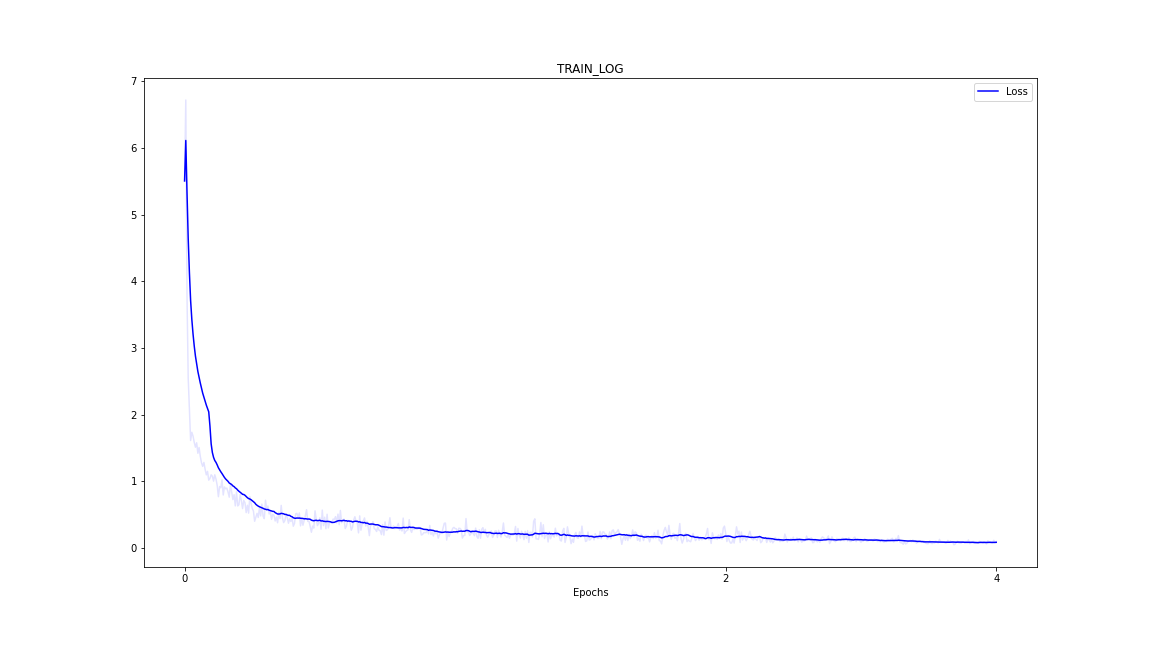

In [8]:
Image('net_logs/experiment/experiment_train_log_0.png')

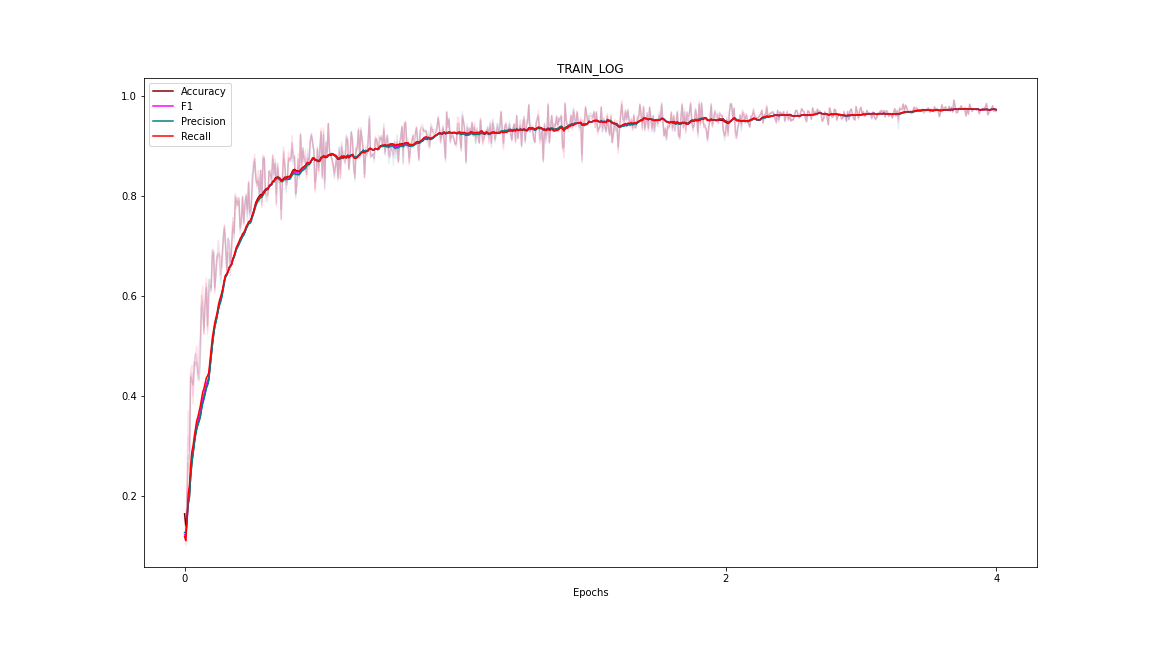

In [9]:
Image('net_logs/experiment/experiment_train_log_1.png')

### Saved logs

In [12]:
import pprint as ppr

In [13]:
log = json.loads(open('net_logs/experiment/experiment_log.json').read())

In [14]:
log

{'phase': 'train',
 'batch_size': 128,
 'epochs': 3,
 'grad_accum_iters': 1,
 'learning_rate': 0.001,
 'gpus': [],
 'pin_memory': False,
 'num_workers': 4,
 'dataset_dir': '',
 'load_limit': 9223372036854775807,
 'log_dir': 'net_logs/experiment',
 'pretrained_path': None,
 'verbose': True,
 'seed_all': False,
 'force': False,
 'patience': 11,
 'load_sparse': False,
 'num_folds': None,
 'split_ratio': None,
 'seed': 15826957,
 'global_test_metrics': [],
 'log_header': 'Loss|Accuracy,F1,Precision,Recall',
 'monitor_metric': 'f1',
 'metric_direction': 'maximize',
 'train_log': [[5.5069, 0.16406, 0.12244, 0.12663, 0.11851],
  [6.72123, 0.11719, 0.11294, 0.12643, 0.10204],
  [3.79215, 0.19531, 0.20856, 0.1945, 0.22481],
  [2.5503, 0.26562, 0.31949, 0.28094, 0.3703],
  [2.08626, 0.25, 0.27178, 0.25471, 0.29132],
  [1.6139, 0.4375, 0.44509, 0.4397, 0.4506],
  [1.73734, 0.42969, 0.44537, 0.43048, 0.46134],
  [1.68033, 0.42188, 0.40214, 0.42237, 0.38376],
  [1.5855, 0.46875, 0.45635, 0.44775, 0